Chapter 15

# SVD分解
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码实现了对一个给定矩阵 $A$ 的奇异值分解（SVD），并逐步展示了 SVD 各部分对二维空间的几何变换过程。代码首先生成一个 $1 \times 1$ 的单位网格，足够大的坐标轴范围，并在单位圆上生成一组散点，表示初始点集。SVD 分解将矩阵 $A$ 表示为三个部分的乘积：

$$
A = U \Sigma V^T
$$

其中：
- $U$ 是一个正交矩阵，表示输出空间的旋转。
- $\Sigma$ 是包含奇异值的对角矩阵，表示在每个方向上的缩放因子。
- $V^T$ 是另一个正交矩阵，表示输入空间的旋转。

代码分为几个步骤展示 SVD 的几何变换效果：

1. **生成并展示初始网格和单位圆**：在 $[-8,8] \times [-8,8]$ 的坐标系中生成一个 $1 \times 1$ 的单位网格，并以 HSV 渲染生成单位圆上的散点，表示初始的坐标和点集。

2. **直接应用矩阵 $A$**：代码直接对初始网格、单位圆散点和坐标轴向量应用 $A$，展示出矩阵 $A$ 的整体作用效果，包括旋转、缩放和偏移。

3. **逐步展示 SVD 的几何变换**：
   - **应用 $V^T$**：代码首先对网格和散点应用 $V^T$，即一个旋转矩阵，展示单位圆和网格的旋转效果：
     $$
     X' = V^T X
     $$
   - **应用 $\Sigma$**：接着，代码将 $\Sigma$ 的缩放效果应用于旋转后的网格和散点，将其沿奇异值方向拉伸或压缩：
     $$
     X'' = \Sigma X'
     $$
   - **应用 $U$**：最后，代码应用 $U$，将缩放后的结果旋转到最终位置，得到完整的变换效果：
     $$
     X''' = U X''
     $$

4. **展示最终的变换结果**：代码在每一步中显示变换后的网格、散点和坐标轴向量，完整展示了 $A$ 的分解对几何空间的作用。这些可视化展示了矩阵 $A$ 如何通过旋转、缩放和再次旋转的过程，将初始的单位网格和单位圆变换为其最终形态。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 定义可视化函数

In [2]:
def visualize(X_grid, X_circle, X_vec, title_txt):
    fig, ax = plt.subplots()  # 创建绘图窗口
    
    # 绘制变换后的网格
    for i in range(X_grid.shape[0]):
        plt.plot(X_grid[i, :, 0], X_grid[i, :, 1], 'k-', linewidth=0.5)  # 绘制网格行
    for j in range(X_grid.shape[1]):
        plt.plot(X_grid[:, j, 0], X_grid[:, j, 1], 'k-', linewidth=0.5)  # 绘制网格列
    
    # 绘制变换后的散点，并用HSV色彩渲染
    colors = plt.cm.hsv(np.linspace(0, 1, X_circle.shape[0]))  # HSV 色彩映射
    for i in range(X_circle.shape[0]):
        plt.plot(X_circle[i, 0], X_circle[i, 1], 'o', color=colors[i], markersize=5)  # 绘制散点
    
    # 绘制变换后的坐标轴方向向量
    plt.quiver(0, 0, X_vec[0, 0], X_vec[0, 1], angles='xy', scale_units='xy', scale=1, color=[0, 0.4392, 0.7529])  # 绘制第一个向量
    plt.quiver(0, 0, X_vec[1, 0], X_vec[1, 1], angles='xy', scale_units='xy', scale=1, color=[1, 0, 0])  # 绘制第二个向量
    
    # 绘制 x 和 y 轴
    plt.axvline(x=0, color='k', zorder=0)  # 绘制 x 轴
    plt.axhline(y=0, color='k', zorder=0)  # 绘制 y 轴
    
    # 设置标签和网格
    plt.ylabel('$x_2$')  # y轴标签
    plt.xlabel('$x_1$')  # x轴标签
    ax.set_aspect(1)  # 设置坐标轴比例
    ax.set_xlim([-3, 3])  # x轴范围
    ax.set_ylim([-3, 3])  # y轴范围
    ax.grid(linestyle='--', linewidth=0.15, color=[0.8, 0.8, 0.8])  # 添加网格
    plt.title(title_txt)  # 设置图标题
    # plt.savefig(title_txt + '.svg')

## 创建一个包含足够大的1x1网格区域

In [3]:
x_vals = np.arange(-8,8+1)  # x轴网格点
y_vals = np.arange(-8,8+1)  # y轴网格点
X1, X2 = np.meshgrid(x_vals, y_vals)  # 生成网格
X_grid = np.stack([X1, X2], axis=2)  # 将网格堆叠为3维数组

## 创建初始的散点（单位圆上的点）

In [4]:
theta = np.linspace(0, 2 * np.pi, 30)  # 生成角度
circle_x1 = np.cos(theta)  # 计算圆上的 x 坐标
circle_x2 = np.sin(theta)  # 计算圆上的 y 坐标
X_circle = np.array([circle_x1, circle_x2]).T  # 创建单位圆散点坐标

## 定义初始坐标轴向量

In [5]:
X_vec = np.array([[1, 0],
                  [0, 1]])  # 初始坐标轴向量

## 绘制原始网格、散点和坐标轴向量

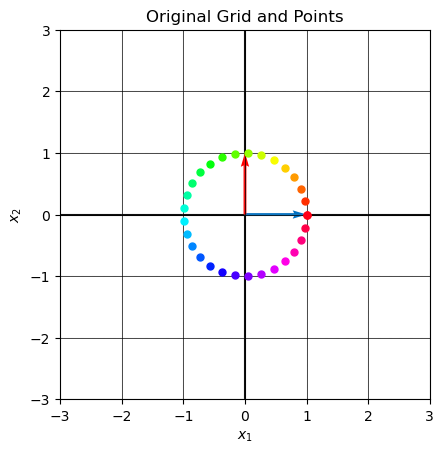

In [6]:
visualize(X_grid, X_circle, X_vec, 'Original Grid and Points')  # 绘制原始图像

## 定义变换矩阵 A

In [7]:
A = np.array([[1.6250, 0.6495],
              [0.6495, 0.8750]])  # 定义矩阵 A

## 绘制应用 A 后的变换

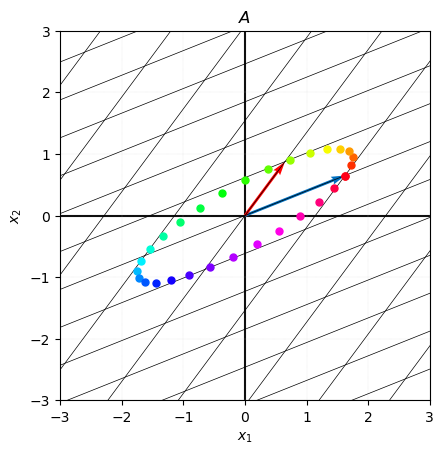

In [8]:
visualize(X_grid @ A.T, 
          X_circle @ A.T, 
          X_vec @ A.T, 
          '$A$')  # 绘制应用 A 后的图像

## SVD 分解：A = U @ S @ V.T

In [9]:
U, S, V_T = np.linalg.svd(A)  # SVD分解
S = np.diag(S)  # 构造对角矩阵 S

In [10]:
# 保证和纸质书结果一致
if U[0, 0] < 0:
    U[:, 0] = -U[:, 0]
    V_T[0, :] = -V_T[0, :]

# 输出 SVD 的分解结果

In [11]:
print('=== U ===')  # 打印 U
print(U)  # 显示 U
print('=== S ===')  # 打印 S
print(S)  # 显示 S
print('=== V.T ===')  # 打印 V.T
print(V_T)  # 显示 V.T

=== U ===
[[ 0.86602858 -0.4999945 ]
 [ 0.4999945   0.86602858]]
=== S ===
[[1.9999835 0.       ]
 [0.        0.5000165]]
=== V.T ===
[[ 0.86602858  0.4999945 ]
 [-0.4999945   0.86602858]]


## 绘制应用 V^T 的变换

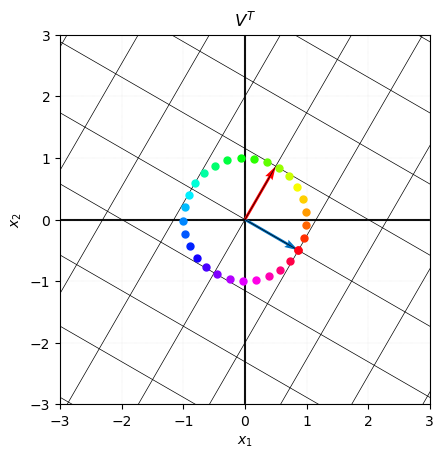

In [12]:
visualize(X_grid @ V_T.T, 
          X_circle @ V_T.T, 
          X_vec @ V_T.T, 
          '$V^T$')  # 绘制应用 V^T 后的图像

## 绘制应用 S @ V^T 的变换

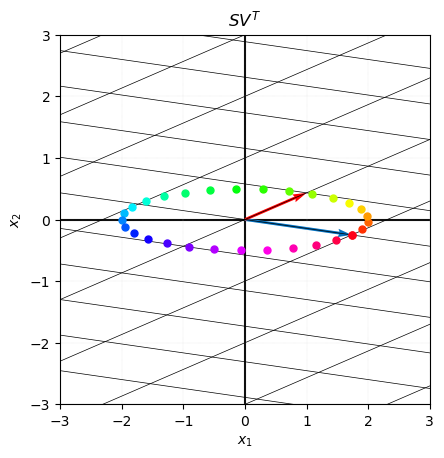

In [13]:
visualize(X_grid @ V_T.T @ S, 
          X_circle @ V_T.T @ S, 
          X_vec @ V_T.T @ S, 
          '$SV^T$')  # 绘制应用 S @ V^T 后的图像

## 绘制应用 U @ S @ V^T 的变换

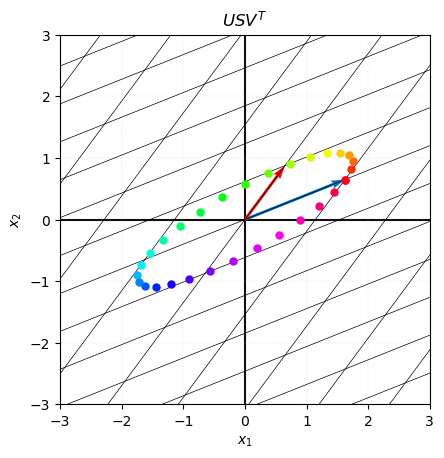

In [14]:
visualize(X_grid @ V_T.T @ S @ U.T, 
          X_circle @ V_T.T @ S @ U.T, 
          X_vec @ V_T.T @ S @ U.T, 
          '$USV^T$')  # 绘制应用 U @ S @ V^T 后的图像